In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
np.random.seed(1031)

In [7]:
import seaborn as sns

In [8]:
color = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59',
'#7dcaa9', '#649E7D', '#dc8018', '#C89F91',
'#6c6d6c', '#4f6268', '#c7cccf']
sns.set_palette( color )

In [9]:
data = pd.read_csv( 'wine.csv',na_values=['NA'] )

In [10]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 刪除指定行列

In [12]:
data.drop(['Mg',"Acl",'Flavanoids','Nonflavanoid.phenols','Proanth','Color.int','Hue','OD','Proline'],axis=1,inplace=True)

因為我主要要進行少像的分析，因此刪除部分資料

In [13]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Phenols
0,1,14.23,1.71,2.43,2.80
1,1,13.20,1.78,2.14,2.65
2,1,13.16,2.36,2.67,2.80
3,1,14.37,1.95,2.50,3.85
4,1,13.24,2.59,2.87,2.80


## 基本圖型
* 對角線 某變量與自身關係 dist plot
* 非對角線 某變量與另一變量的關係 scatter plo

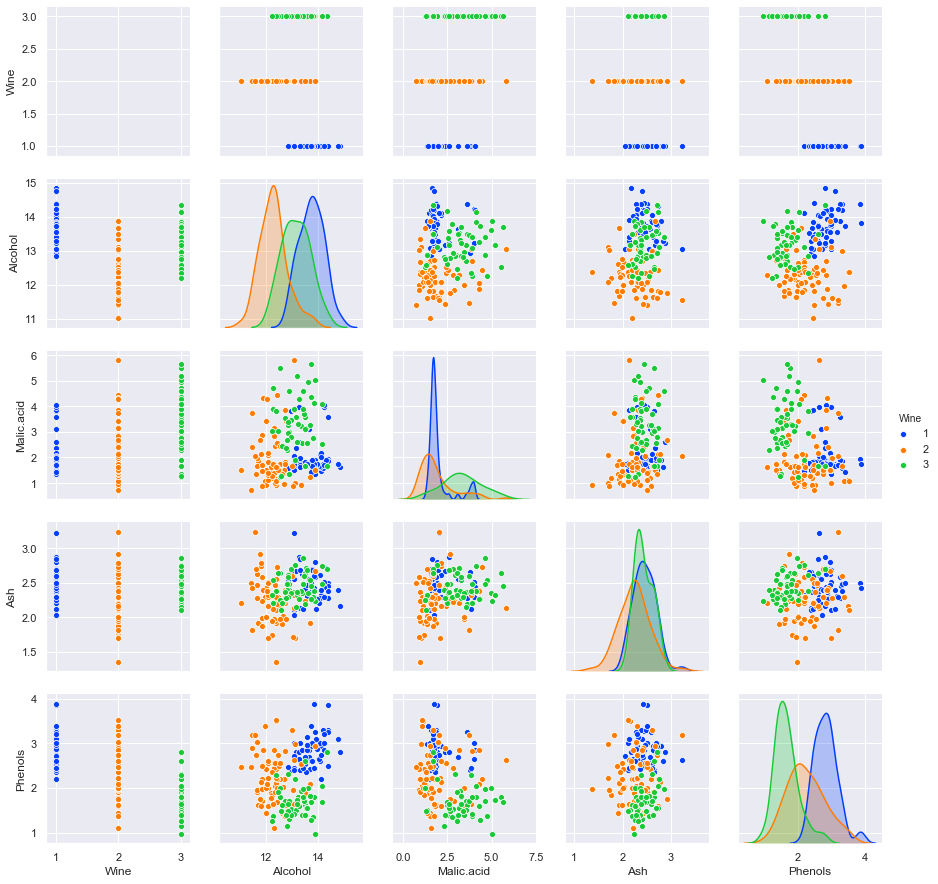

In [36]:
sns.pairplot(data.dropna(), hue = 'Wine')

* data.dropna() 除去NaN的值 因為圖不能顯示
* hue 代表顏色

## 自定義配色風格與調色盤
* style : darkgrid, whitegrid, dark, white 和 ticks .
* palette : deep, muted, pastel, bright, dark 和 colorblind

In [25]:
 sns.set(style='ticks')
 sns.set(palette='pastel')

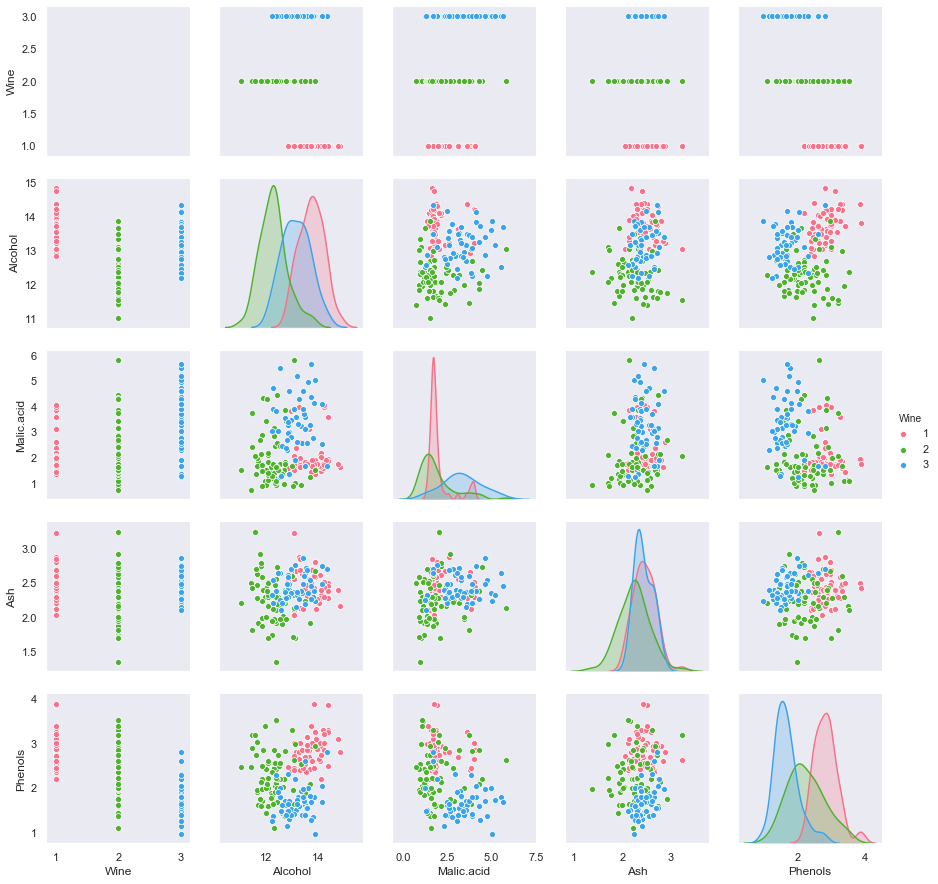

In [27]:
sns.set_style('dark')
sns.pairplot( data, hue='Wine',
palette='husl' );

將背景變為灰色 色版變成husl

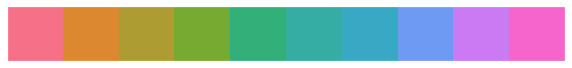

In [28]:
sns.palplot( sns.color_palette('husl',10) )

husl是一色彩系統 取10樣本色展示如上

## 整個圖形的色彩設計

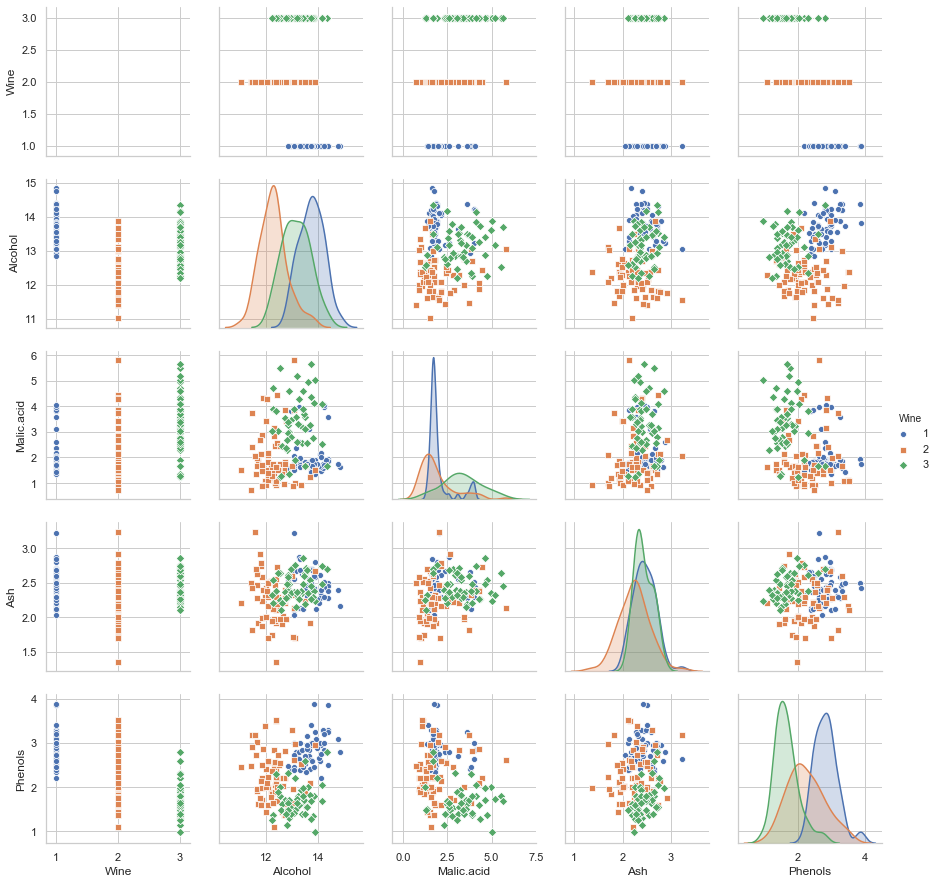

In [30]:
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.pairplot( data, hue='Wine',
markers=['o','s','D'] );

## 子集化圖表

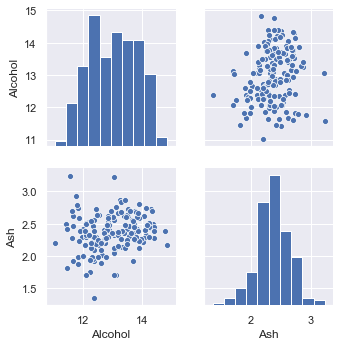

In [31]:
sns.set_style('darkgrid')
sns.pairplot( data,
vars=['Alcohol',
'Ash'], );

## 線性迴歸圖表

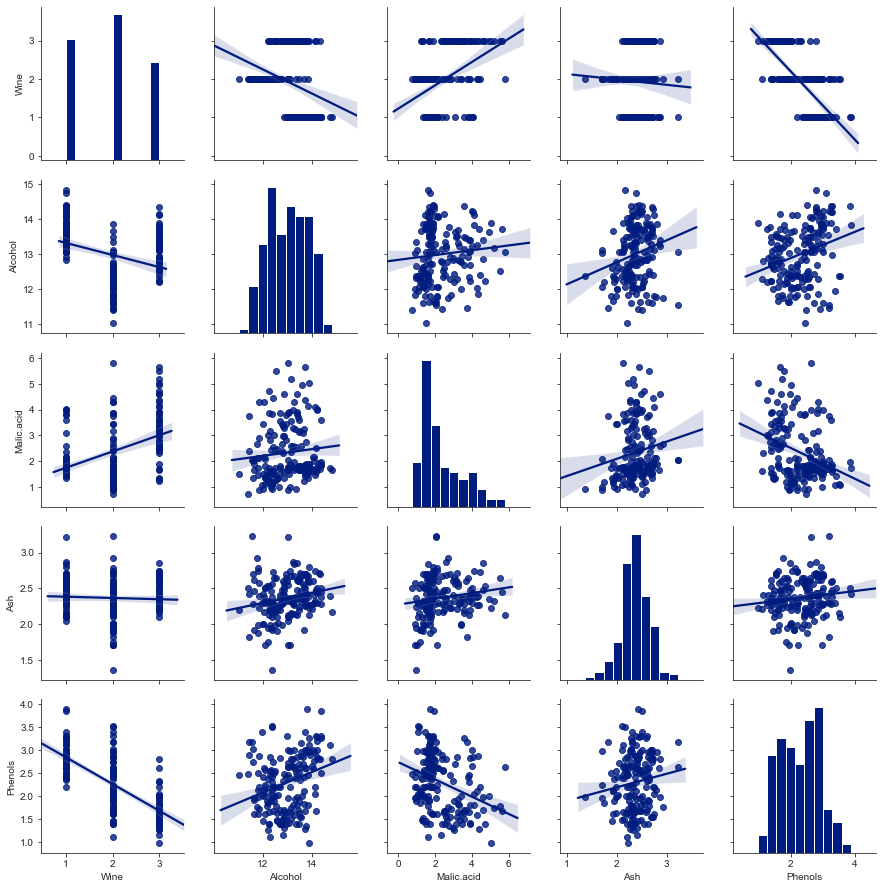

In [14]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(data, kind='reg' );

## 核密度圖

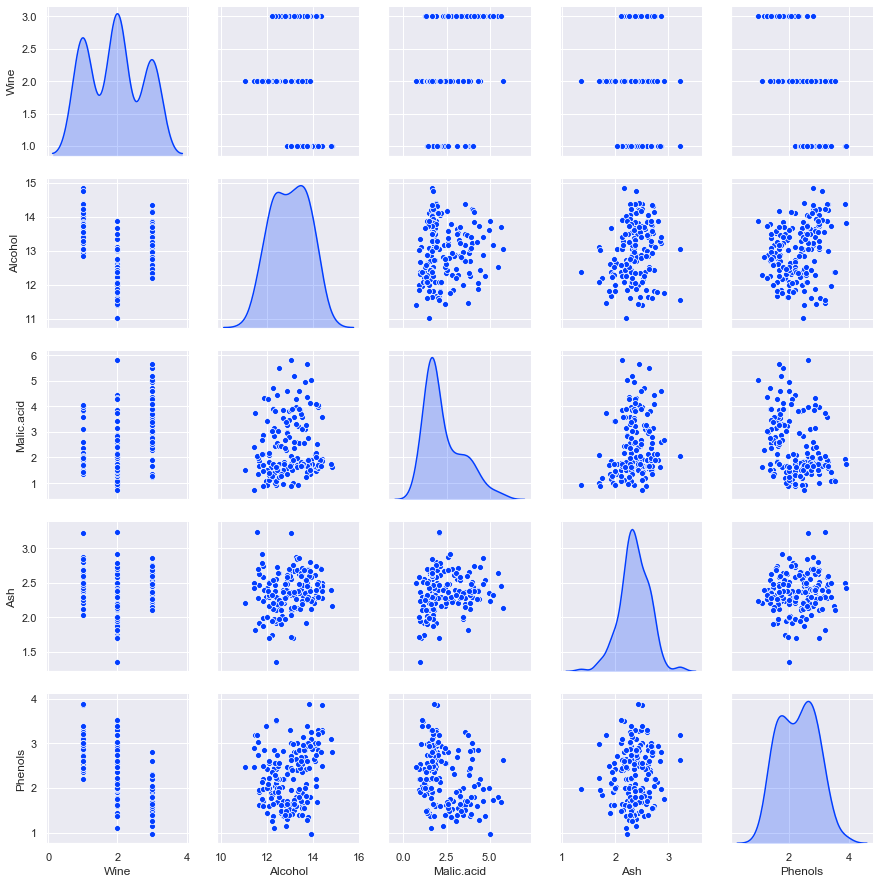

In [32]:
sns.set_palette('bright')
sns.pairplot( data, diag_kind='kde' );

## 雙變量分佈圖

用雙變量繪出Ash Alcohol跟寬度的一維分佈

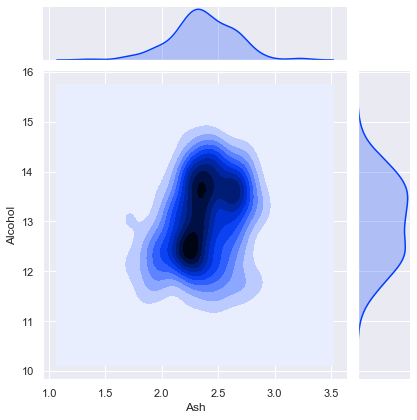

In [37]:
sns.jointplot( 'Ash', 'Alcohol',data=data,kind='kde')

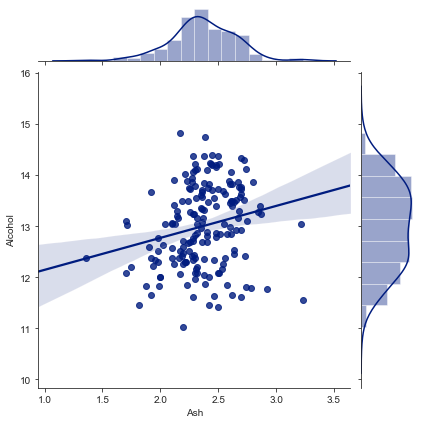

In [16]:
sns.jointplot(  'Ash', 'Alcohol',data=data,kind='reg')